<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> End to End Case Study <br>
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

## Introduction
### The purpose of this tutorial is to give a demonstration of the 10 step method we can use in scikit learn to do any machine learnig task. In particular we are tackling the regression problem to predict a numerical outcome variable.**

### Note: Please run this notebook using an Anaconda virtual environment in Python 3.8
### The dataset
**We use the Boston dataset to demonstrate the code for predicting house price. This dataset in available in the datasets library of scikit learn**


### Attribute Information
Attribute Information (in order):
   - CRIM     per capita crime rate by town
   - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
   - INDUS    proportion of non-retail business acres per town
   - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   - NOX      nitric oxides concentration (parts per 10 million)
   - RM       average number of rooms per dwelling
   - AGE      proportion of owner-occupied units built prior to 1940
   - DIS      weighted distances to five Boston employment centres
   - RAD      index of accessibility to radial highways
   - TAX      full-value property-tax rate per 10,000 USD
   - PTRATIO  pupil-teacher ratio by town
   - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
   - LSTAT    percent lower status of the population
   - MEDV     Median value of owner-occupied homes in $1000's

### Description of the task
The task is to produce a machine learning model to predict the median price of a house ( in 1000's of USD) called 'MEDV' given the rest of the features 


### The steps of Machine Learning Prediction Task
1. Import the required libraries
2. Load the dataset and view it
3. Do a sanity check on the data 
4. Do the exploratory data analysis(EDA)
5. Preprocess the data and do the feature engineering
6. Fit the scikit learn machine learning models on the training data 
7. Evaluate the model performance of the models on the test data 
8. Optimize/Regularize the Model using RidgeCV, LassoCV, GridSearchCV
9. Interpretation of the Model
10. Deploy the experimental model using pycaret and streamlit

### Step1: Load the Libraries 
- In this step we load all the essential libtraries to do our analysis of the datset and fit the linear models


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
print(" All the libraries are imported")

 All the libraries are imported


### Step2: Load the dataset and view it
- If it is a .csv or .xlsx file we just use pandas.read_csv or pandas.read_excel

In [2]:
# from sklearn.datasets import fetch_openml
# housing=fetch_openml(name='house_prices', as_frame=True)
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

The Boston housing datset is in the form of a data type called Bunch which is like a Dictionary

In [4]:
# Lets get the keys of the bunch
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# Lets access the values of the Description key DESCR
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# get the features and target arrays
X=boston.data
y=boston.target

In [7]:
# convert the Boston bunch data into pandas dataframe
df=pd.DataFrame(X, columns=boston.feature_names)
df['MEDV']=y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Step3: Do a sanity check on data
This includes looking at the:
- shape of the dataset
- datatypes of variables-- to look for any consistencies regarding datatypes
- descriptives of numerical variables
         - to identify any data engineering error, eg where missing values in numerical variables are replaced by 0
- To look for any non interpreatble symbols like $ sign in front of prices 
- Do a value counts for all categorical variables
- To Look for inconsistencies among classes of categorical variables ( example if type of is wriiten as 'county' vs.   type 'COUNTY' vs 'County'

In [8]:
# get the shape of the dataset
print(df.shape)
print('')
print("The number of rows is ", df.shape[0])
print('')
print("The number of columns is ", df.shape[1])

(506, 14)

The number of rows is  506

The number of columns is  14


In [9]:
# get the data types of the data  
df.dtypes

# we call also use df.info()

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

We see that all variables are numerical having correct datatypes which looks good for this dataset

In [10]:
# Identify the columns having null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in this datsset

In [11]:
# get the numerical descriptives 
# .T gives the transpose to mmake the descriptives more readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Except CHAS none of the columsn have minimum value 0 , which also looks good 

### Step4: Do an EDA of the data
- This is a very extensive process and will differ from datset to datset
- We normally do the EDA in the following manner: Univariates Analysis, Bivariate Analysis, Multivariate Analysis, Outlier Analysis, Missing Value Treatment
- In univariate analysis we look at the shape and spread of the distrbutions of numerical datas and the class imbalances of categorical data
- In bivariate analysis we look at scatter plots, bivaraite boxplots, clustered bar charts and bivariate tables to look for relationships
- The aim of EDA is to get patterns and trends from the datset

**Univariate ANalysis**

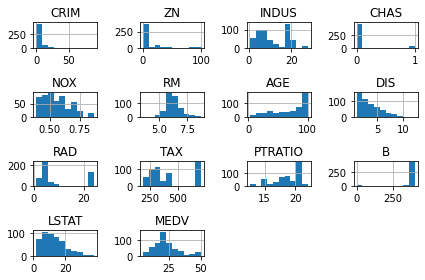

In [12]:
# lets get the univariate graphs of numerical variables
df.hist()
plt.tight_layout()

The outcome variable 'MEDV' is approximately normally distributed 

CRIM


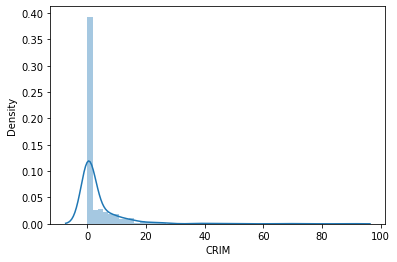

****************************************************
ZN


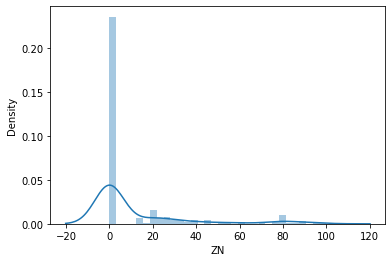

****************************************************
INDUS


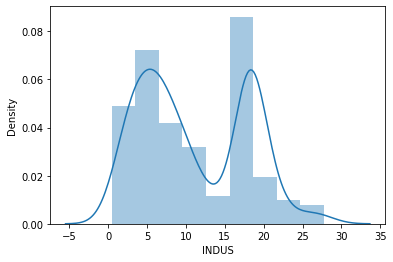

****************************************************
CHAS


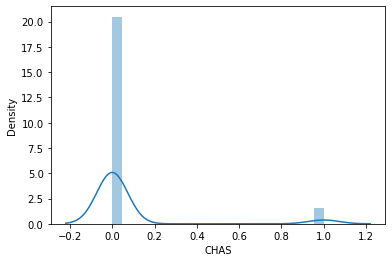

****************************************************
NOX


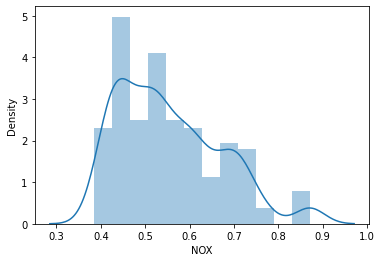

****************************************************
RM


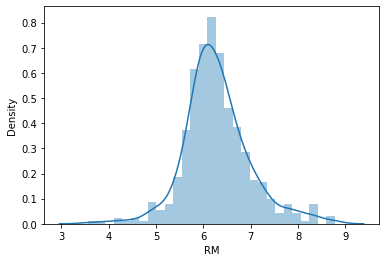

****************************************************
AGE


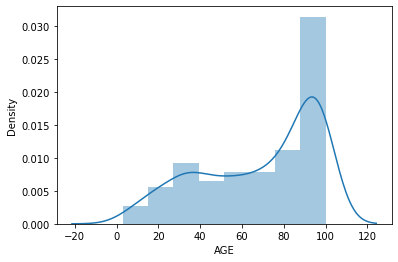

****************************************************
DIS


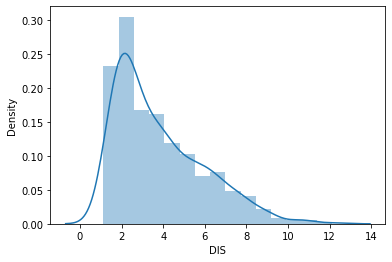

****************************************************
RAD


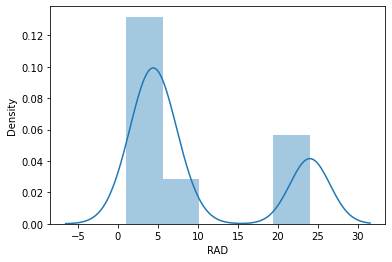

****************************************************
TAX


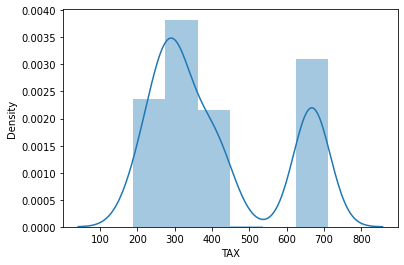

****************************************************
PTRATIO


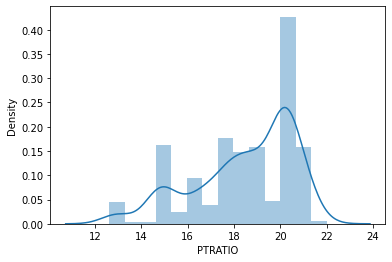

****************************************************
B


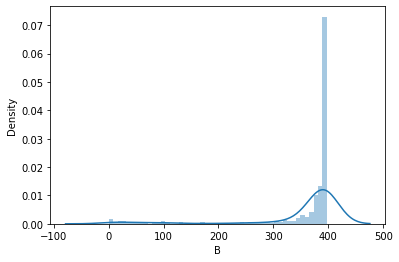

****************************************************
LSTAT


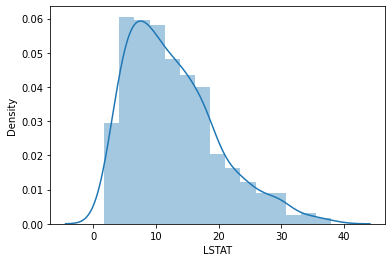

****************************************************
MEDV


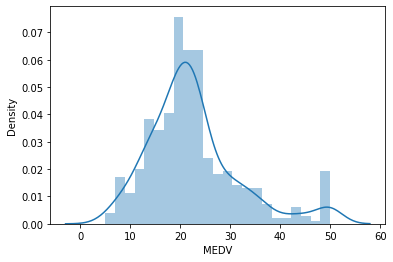

****************************************************


In [13]:
# look at the individual distribution plots
for col in df.select_dtypes(exclude='O').columns:
    print(col)
    sns.distplot(df[col], kde=True)
    plt.show()
    print("****************************************************")

The outcome variable MEDV is approximately normally distributed 

<AxesSubplot:>

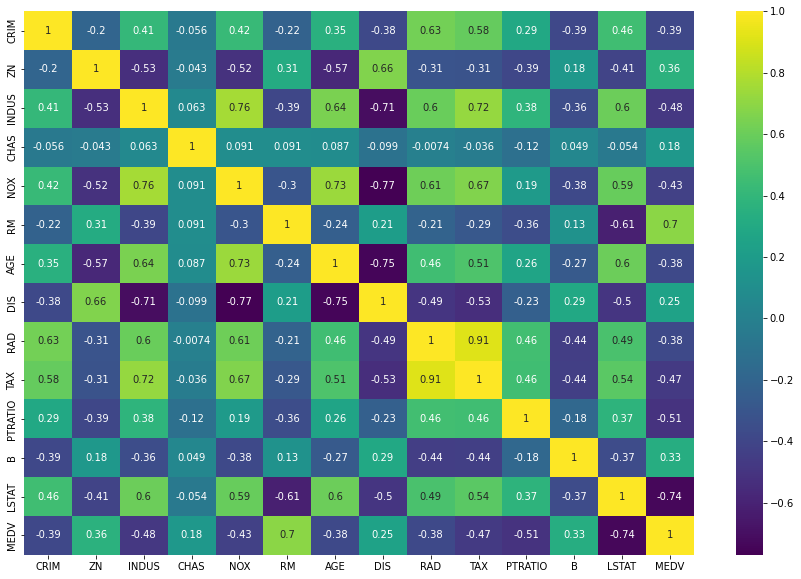

In [14]:
#Create a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

- We see that RM and LSTAT have high correlation with MEDV
- We note that CHAS has very low correlation with MEDV so we may drop it for the modelling

In [15]:
df.drop('CHAS', axis=1, inplace=True)

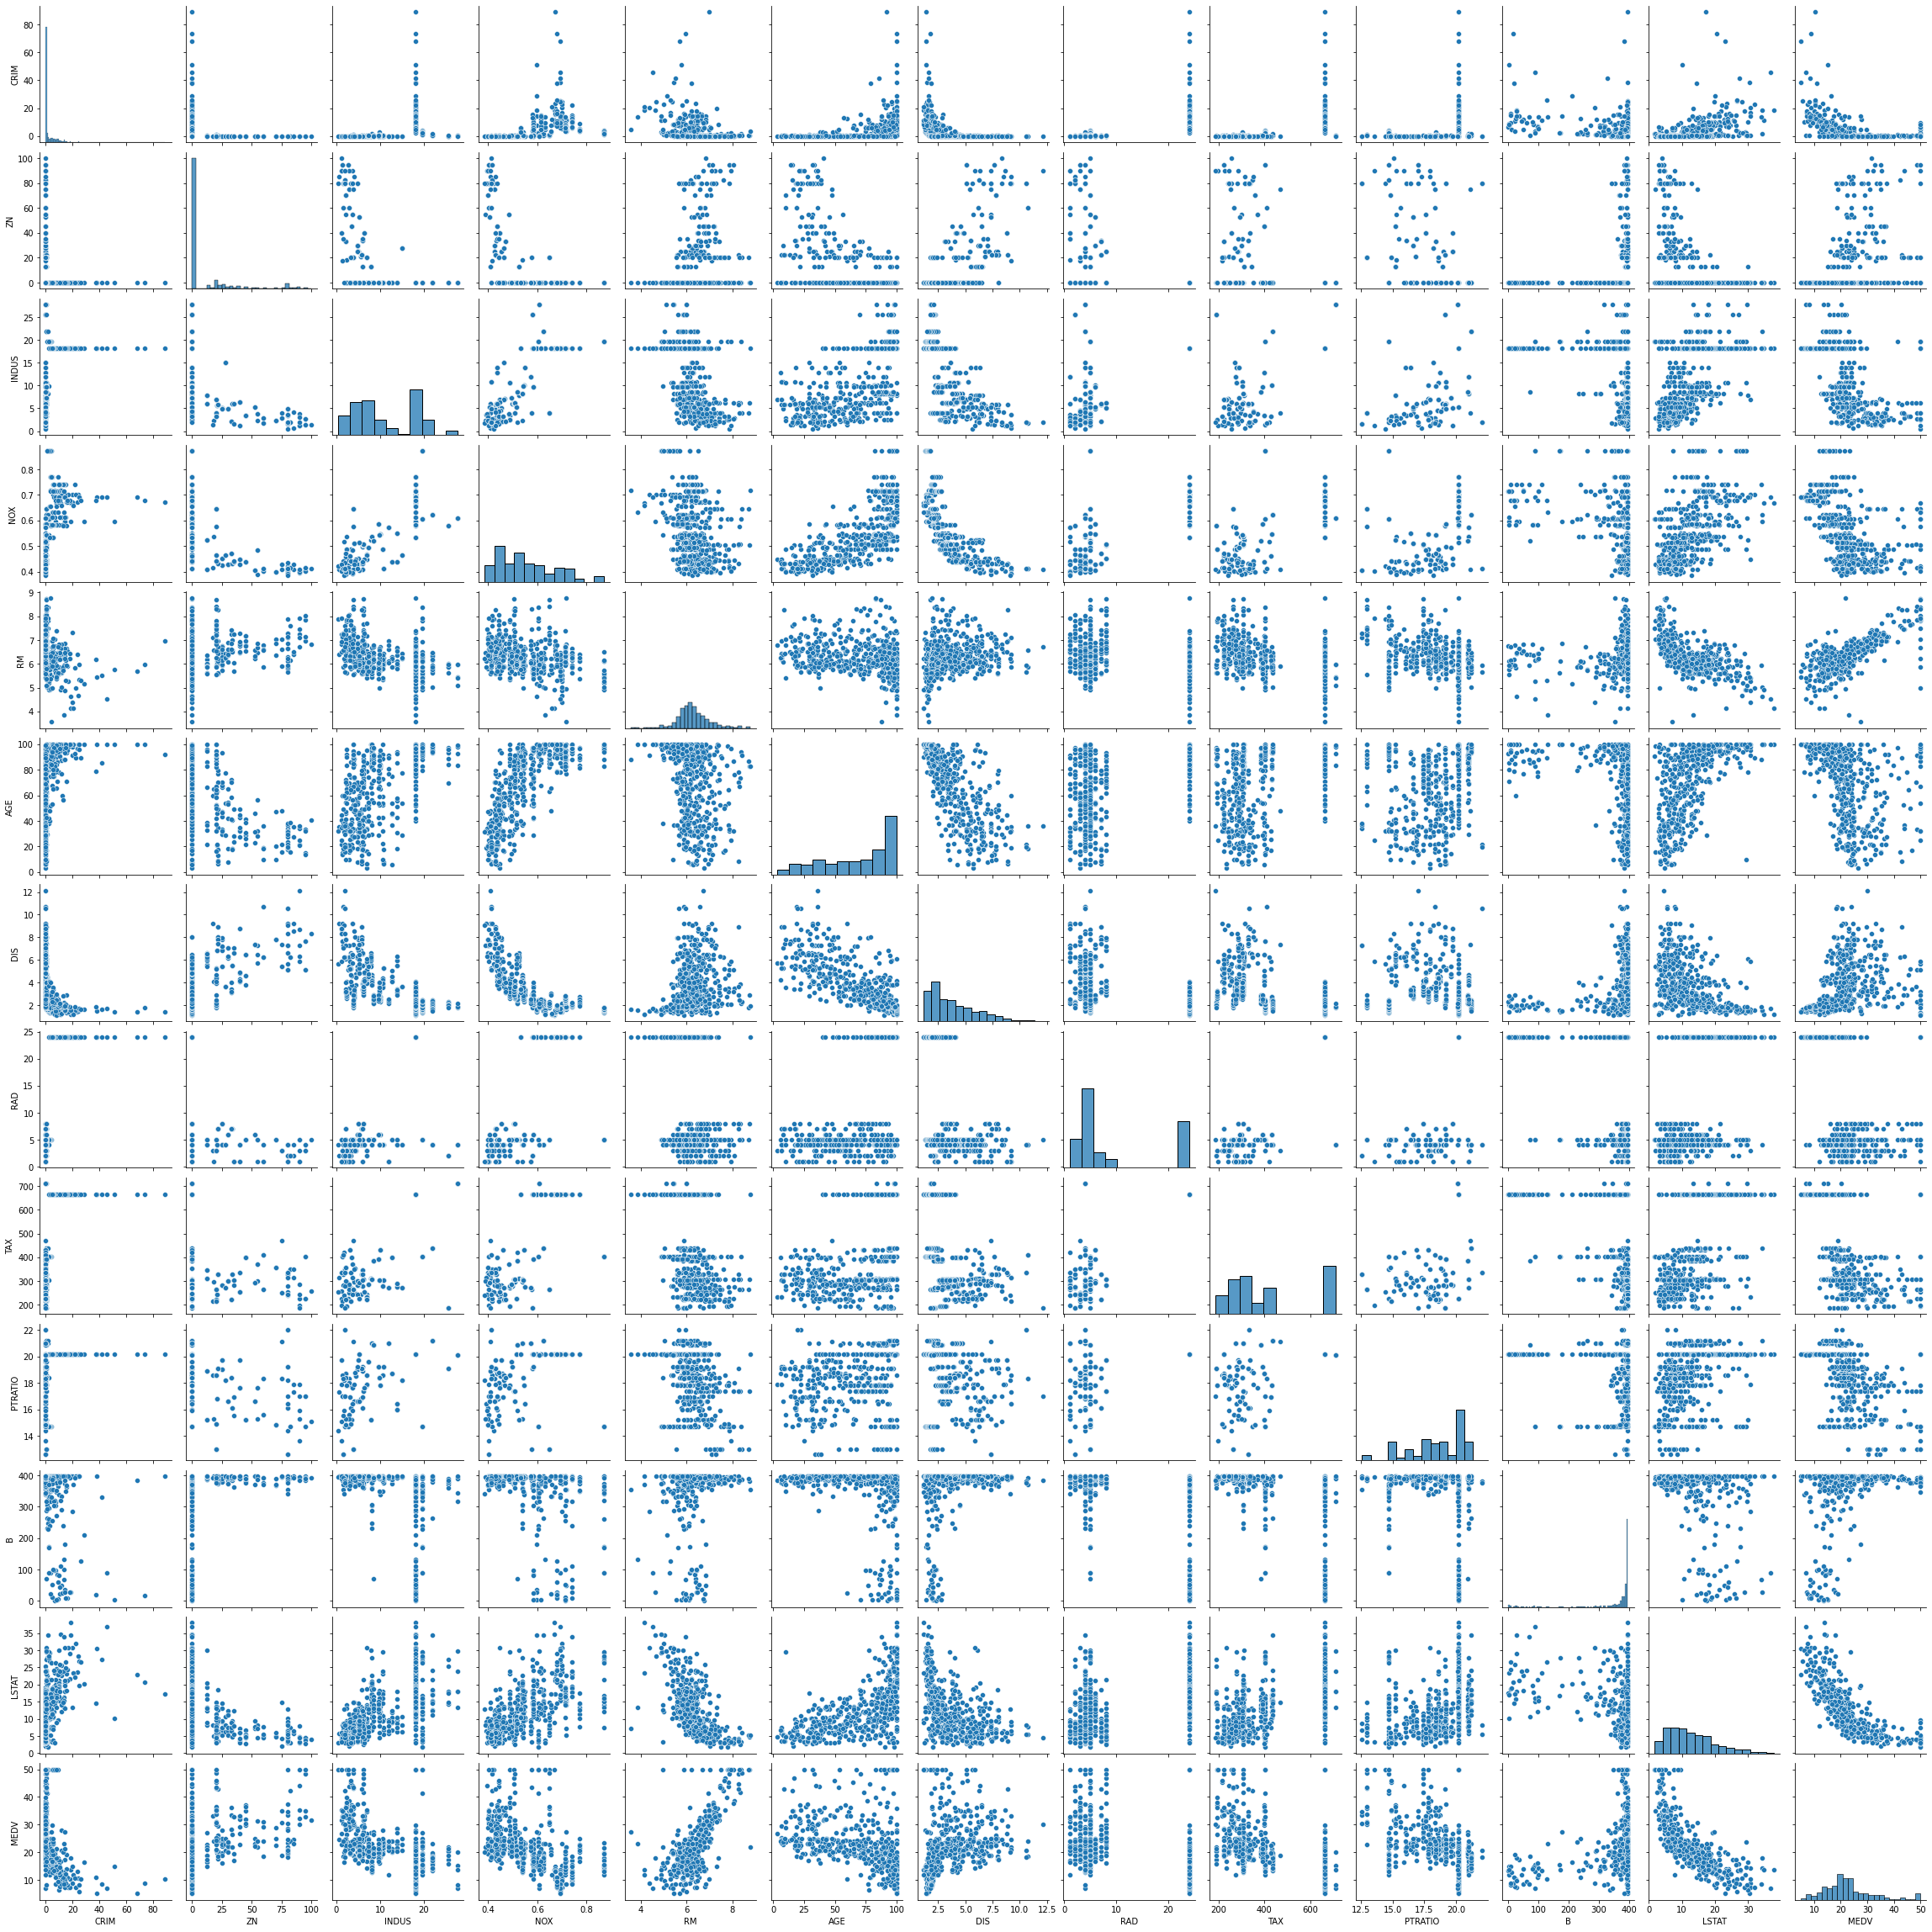

In [16]:
# we make a pairplot to get the bivariate relationships
sns.pairplot(df)

- MEDV has strong positive correlation with RM as evidently seen in the scatterplot
- MEDV has strong neagtaive correlation with LSTAT (though there is a non linear trend visible)

### Step5: Do the feature pre-processing for multiple linear regression
- This step inlcudes things like:
1. Sepearate the features and label
2. Impute the missing values
3. Do the label encoding/one-hot encoding for categorical features
4. Do the train test split
5. Do the feature scaling

In [17]:
# Seperate the features and the target
# Here we are using all features and MEDV as target
X=df.drop('MEDV', axis=1)
y=df.MEDV

Since there are no missing values or categorical variable we got tjhe next step whcih is train-test-split

In [18]:
# Do the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3 ,random_state=401)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(354, 12) (354,) (152, 12) (152,)


In [19]:
# Feature scaling is additional for regression since scikit learn performs feature scaling under the hood, you can test this 
#by seeing that scaling has no imporvement in the overall performance of regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Step6: Fit the regression models on training set
- Scikit learn performs OLS under the hood for linear regressionbut needs the data to be as a numpy array or a pandas dataframe
- For a simple linear regression scikit learn tries to find the best a and b such that y=ax+b is the best fitting line
- For a multiple linear regression scikit learn tries to find the best a, b1, b2,... such that y=a+ b1x1+ b2*x2+... is the       best fitting hyperplane
- Also for multiple regression it minimizes the loss function on the training set which is usually the mean squared error 

**Multiple Linear Regression model**

In [20]:
# instantiate the scikit learn model
model_lr=LinearRegression()

# fit the model to the training set 
model_lr.fit(x_train, y_train)

# making prediction on the testing set
y_pred=model_lr.predict(x_test)

### Step7: Evaluate the model performance on the Test set 

In [21]:
# let us create a function for evaluation
def evaluate(y_test, y_pred, model_name):
    print("The model metrics are below for the model "+model_name)
    print('')
    print("The R2 score is ", r2_score(y_test, y_pred))
    print("")
    print("The root mean squared error is ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("")
    print("The mean absolute error is ", mean_absolute_error(y_pred, y_test))
    print("")

In [22]:
# Evaluate the metrics for the OLS model
evaluate(y_test, y_pred, "OLS Full Model")

The model metrics are below for the model OLS Full Model

The R2 score is  0.7143821425859849

The root mean squared error is  5.441708897623559

The mean absolute error is  3.6701749494205096



The current OLS model performs at an R2 score of 72.3 percent which means that the data is explaining 72.3% of variance in the Median House Value 

**Trying other Regression Models**

In [23]:
# We first use Decision Tree Regressor which is an entropy based model
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
y_pred=model_dt.predict(x_test)
evaluate(y_test, y_pred, 'Decision Tree Regressor')


The model metrics are below for the model Decision Tree Regressor

The R2 score is  0.768442259604567

The root mean squared error is  4.899731464177668

The mean absolute error is  3.0421052631578944



In [24]:
# next we make a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Random Forest Regressor')

The model metrics are below for the model Random Forest Regressor

The R2 score is  0.8912800263164462

The root mean squared error is  3.3573552424020017

The mean absolute error is  2.227065789473684



In [25]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(x_train, y_train)
y_pred=model_svr.predict(x_test)
evaluate(y_test, y_pred, 'Support Vector Regressor')

The model metrics are below for the model Support Vector Regressor

The R2 score is  0.6136470890824859

The root mean squared error is  6.328994547443428

The mean absolute error is  3.682235790457602



In [26]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()
model_knn.fit(x_train, y_train)
y_pred=model_knn.predict(x_test)
evaluate(y_test, y_pred, 'K Nearest Neighbors')

The model metrics are below for the model K Nearest Neighbors

The R2 score is  0.7896508043272147

The root mean squared error is  4.669958863788168

The mean absolute error is  2.9273684210526314



**We see that Random  Forest Regressor performs the best with 89% R2 Score and should be the model of choice for us. We would need to regularize and optimize this model using GridSearchCV before deployment**

### Step8: Regularization/Optimization
- Regularization is the process of applying a penalty to the loss function so to reduce the large coefficients
- Ridge regularization adds to the OLS loss function lambda( in scikit learn it is alpha) times  the sum of squares of the coefficients
- Lasso regularization on the other hand adds to the OLS loss function lambda times the sumof ansolute values of the coefficients
- The differnce between Ridge and Lasso is that Lasso reduces unimportant coefficients to exactly 0 , thus also performs feature selection
- For other non linear models like Decision TRees and Random Forst we use GridSearchCV to do the regularization/optimization

**Ridge Regression**

In [27]:
from sklearn.linear_model import RidgeCV
# first iteration
ridge=RidgeCV()
#ridge.fit(x_train, y_train)
ridge.fit(x_train, y_train)
alpha=ridge.alpha_
print("best alpha is ", alpha)
# second iteration
m=np.arange(0.01, 2.000, 0.005)
ridge=RidgeCV(alphas=alpha*m)
ridge.fit(x_train, y_train)
alpha=ridge.alpha_
print("second iteration best alpha is ", alpha)
y_pred=ridge.predict(x_test)
evaluate(y_test, y_pred, 'Ridge')

best alpha is  10.0
second iteration best alpha is  7.0
The model metrics are below for the model Ridge

The R2 score is  0.7112715458134061

The root mean squared error is  5.471260839269782

The mean absolute error is  3.6533493990910624



Ridge model has picked 12 features.

Ridge model has dropped 0 features.


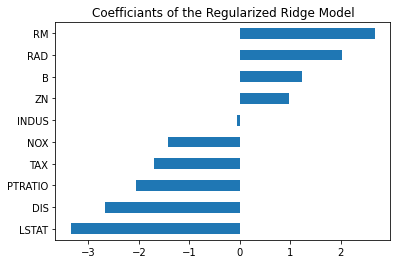

In [28]:
# plot the feature importances
# get the coefficients corresponding to each alpha
coefficients=pd.Series(ridge.coef_, index=X.columns)

# lets check the features picked or dropped by Ridge
print("Ridge model has picked "+ str(sum(coefficients!=0))+ " features.")
print('')
print("Ridge model has dropped "+ str(sum(coefficients==0))+ " features.")
# display the top 5 and least 5 coeffs based on their importances
important_coefficiants=pd.concat([coefficients.sort_values().head(), coefficients.sort_values().tail()])
important_coefficiants.plot(kind='barh')
plt.title("Coefficiants of the Regularized Ridge Model")
plt.show()

**Lasso Regression**

In [29]:
from sklearn.linear_model import LassoCV
# first iteration
lasso=LassoCV()
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print("best alpha is ", alpha)
# second iteration
m=np.arange(0.01, 2.000, 0.005)
lasso=LassoCV(alphas=alpha*m)
lasso.fit(x_train,y_train)
alpha=lasso.alpha_
print("second iteration best alpha is ", alpha)
y_pred=lasso.predict(x_test)
evaluate(y_test, y_pred, 'lasso')

best alpha is  0.011134027056535852
second iteration best alpha is  0.01191340895049336
The model metrics are below for the model lasso

The R2 score is  0.713719658402997

The root mean squared error is  5.448016202899943

The mean absolute error is  3.6656363154365805



lasso model has picked 12 features.

lasso model has dropped 0 features.


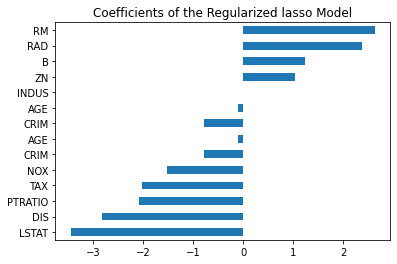

In [30]:
# plot the feature importances
# get the coefficiants corresponding to each alpha
coefficients=pd.Series(lasso.coef_, index=X.columns)

# lets check the features picked or dropped by lasso
print("lasso model has picked "+ str(sum(coefficients!=0))+ " features.")
print('')
print("lasso model has dropped "+ str(sum(coefficients==0))+ " features.")
# display the top 5 and least 5 coeffs based on their importances
important_coefficiants=pd.concat([coefficients.sort_values().head(7), coefficients.sort_values().tail(7)])
#important_coefficiants=pd.concat([coefficients.sort_values().head(5), coefficients.sort_values().tail(5)])
important_coefficiants.plot(kind='barh')
plt.title("Coefficients of the Regularized lasso Model")
plt.show()

**Optimize the Random Forest Model using GridSearchCV**

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,150,200] ,
            'min_samples_leaf' : range(1,5,1),
            'min_samples_split' : range(2,10,2),
            'max_depth' : range(5,50,5),
            'max_features': ['log2', 'sqrt']}
n_folds=3
cv= GridSearchCV(estimator=model_rf,param_grid=param_grid,cv=n_folds,verbose=3, n_jobs=-1, return_train_score=True)
cv.fit(x_train, y_train)
             

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(5, 50, 5),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=3)

In [35]:
cv.best_score_

0.8317780815440902

In [36]:
cv.best_estimator_

RandomForestRegressor(max_depth=35, max_features='sqrt', n_estimators=200)

In [37]:
tuned_model_rf=cv.best_estimator_
tuned_model_rf.fit(x_train, y_train)
y_pred=tuned_model_rf.predict(x_test)
evaluate(y_test, y_pred, 'Tuned Random Forest')

The model metrics are below for the model Tuned Random Forest

The R2 score is  0.8812479360810641

The root mean squared error is  3.508837133056444

The mean absolute error is  2.3290592105263133



We see that the tuned Random Forest Regressor has lower R2 score than the untuned one 

### Step9: Interpretation of the model

**SHAP**,which stands for “SHapley Additive exPlanations", is one of the most effective model interpretation technique. It not only allows Global interpretations like  **feature importances** but also local interpretattions like what is the **contribution of each feature** for each individual prediction.SHAP achieves this by calculating what is known as **SHAP values**. SHAP can used to expain a wide variety of models like linear models, tree based models and neural networks. You can learn more about SHAP here https://shap.readthedocs.io/en/latest/index.html

In [38]:
#!pip install shap

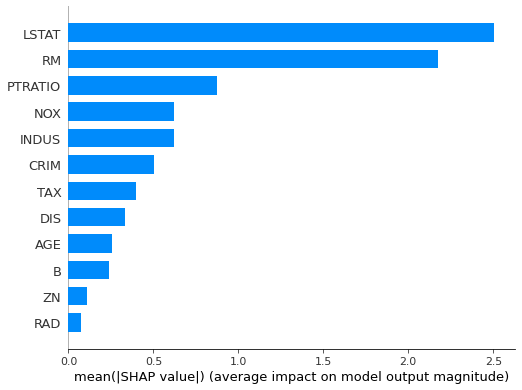

In [39]:
# use shap to interpret the model
import shap
names=X.columns
value=shap.TreeExplainer(tuned_model_rf).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=names)

We see that the most important features for predicting house price are LSTAT and RM ( the average number of rooms) which is quite logical

### Step10: Deploy the Regression Model using Pycaret and Streamlit

Check out these links for more informaytion on pycaret and streamlit
- https://pycaret.gitbook.io/docs/
- https://streamlit.io/

In [40]:
# !pip install pycaret
# !pip install streamlit

In [41]:
import pycaret
#import regression module
from pycaret.regression import *
#intialize the setup
exp_reg = setup(df, target = 'MEDV')

,Description,Value
0,session_id,5125
1,Target,MEDV
2,Original Data,"(506, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 12)"


In [42]:
# compare different regression models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1721,9.8142,3.0708,0.8816,0.1414,0.1101,0.0560
gbr,Gradient Boosting Regressor,2.3706,11.6950,3.3234,0.8584,0.1527,0.1203,0.0250
lightgbm,Light Gradient Boosting Machine,2.3839,12.5188,3.4817,0.8538,0.1576,0.1201,0.0170
rf,Random Forest Regressor,2.3892,12.3951,3.4214,0.8515,0.1538,0.1205,0.0830
ada,AdaBoost Regressor,2.9027,16.4487,3.9521,0.8022,0.1822,0.1513,0.0330
lr,Linear Regression,3.6390,26.7350,5.0669,0.6995,0.2492,0.1783,0.8340
lar,Least Angle Regression,3.6390,26.7350,5.0670,0.6995,0.2492,0.1783,0.0060
ridge,Ridge Regression,3.6090,27.0620,5.0928,0.6951,0.2628,0.1779,0.0050
dt,Decision Tree Regressor,3.2756,25.9846,4.9648,0.6862,0.2164,0.1689,0.0070
br,Bayesian Ridge,3.6977,28.0959,5.1978,0.6813,0.2648,0.1811,0.0050


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5125, verbose=0, warm_start=False)

In [43]:
# create a 10 fold cross validation random forest regressor
rf=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4338,16.4953,4.0614,0.8331,0.1684,0.1219
1,2.2864,8.0666,2.8402,0.9226,0.1368,0.1137
2,3.0804,15.9559,3.9945,0.8261,0.1819,0.1447
3,3.0149,19.1692,4.3783,0.8124,0.1874,0.1470
4,2.2248,10.4395,3.2310,0.8336,0.1657,0.1194
5,2.0411,7.6822,2.7717,0.9288,0.1504,0.1167
6,2.3937,11.0591,3.3255,0.9032,0.1557,0.1344
7,1.6039,4.1120,2.0278,0.9138,0.0940,0.0753
8,1.9607,7.4988,2.7384,0.9083,0.1152,0.0918
9,2.8521,23.4728,4.8449,0.6334,0.1827,0.1402


In [44]:
# tune the model
tuned_rf=tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.7778,25.7346,5.0729,0.7397,0.1711,0.1178
1,2.5853,10.7636,3.2808,0.8967,0.1536,0.1282
2,2.8161,15.5937,3.9489,0.8300,0.1819,0.1402
3,3.2071,22.4712,4.7404,0.7800,0.1995,0.1572
4,2.3578,10.2314,3.1987,0.8369,0.1609,0.1224
5,2.3964,9.0374,3.0062,0.9162,0.1586,0.1368
6,3.0123,28.6303,5.3507,0.7495,0.2045,0.1559
7,1.8441,5.3833,2.3202,0.8872,0.0987,0.0861
8,2.3894,9.9965,3.1617,0.8777,0.1289,0.1159
9,2.7508,15.0147,3.8749,0.7655,0.1617,0.1376


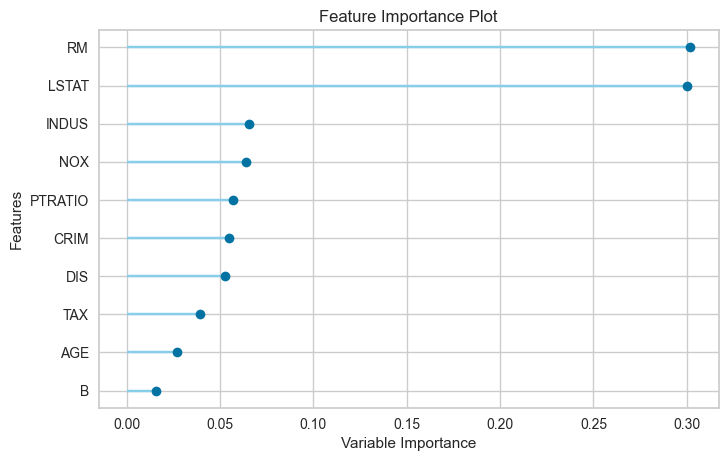

In [45]:
# interpret the model
plot_model(tuned_rf, plot='feature')

In [46]:
# save the model
save_model(tuned_rf, 'Final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='MEDV',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=7,
                                        max_features='sqrt', max_leaf_nodes=None,
                                        max_samples=None,
                                

# Deployment in Streamlit

**Note**: 
1. When you run the code below this will create a **app.py** file in your working directory
2. Use **python --version** command in anaconda command prompt to check the version of the python insatlled 
3. Make sure it is **Python 3.8 or Python 3.7**
4. If it is different create a new virual environment(say venv) in anaconda using **Python 3.8**
5. From the anaconda command prompt of this new virtual environment cd to the working directory and run the command **streamlit run app.py**

In [47]:
%%writefile app.py
import pandas as pd
import streamlit as st
from pycaret.regression import load_model, predict_model

#STEP1 : IMPORT THE TRAINED MODEL PIPELINE
# import the trained model
model=load_model('Final_model')


# STEP2: GET NEW DATA FOR PREDICTION FROM THE FRONT END
st.title("App to predict the house prices")
crim=st.slider('CRIM', 0.001, 100.0)
zn=st.slider('ZN',0.001, 100.0)
indus=st.slider('INDUS', 0.5, 28.0)
chas=st.selectbox('CHAS', [0,1])
nox=st.slider('NOX',0.4, 0.8)
rm=st.slider('RM', 3,9)
age=st.slider('AGE',2.9, 100.0)
dis=st.slider('DIS', 1.1, 12.1)
rad=st.slider('RAD',0,28)
tax=st.slider('TAX',187,800)
ptratio=st.slider('PRATIO',12.6, 22.0)
b=st.slider('B',0.3, 397.0)
lstat=st.slider('LSTAT', 1.7, 40.0)

data={
    'CRIM':crim,
    'ZN':zn,
    'INDUS':indus, 
    'CHAS':chas,
    'NOX':nox,
    'RM':rm, 
    'AGE':age,
    'DIS':dis,
    'RAD':rad,
    'TAX':tax,
    'PTRATIO':ptratio,
    'B':b, 
    'LSTAT':lstat
}

input_data=pd.DataFrame([data])
#input_data=str(input_data)

# STEP3 : GET THE PREDICTION AND DISPLAY IT
if st.button("Predict"):
    prediction=predict_model(model, input_data)
    st.success("The predicted price of the house in 1000's of $ is as below")
    prediction['Label'][0]

Writing app.py


Note: To run this app locally:
1. Open a new Anaconda Prompt 
2. Activate the virual environment by typing **activate venv**
3. cd to the current directory where app.py exists
4. Type the code **streamlit run app.py**

This is app is deployed here at this url https://share.streamlit.io/davidpratap/regression-demo/main/app.py

# END